In [1]:
import deepchem as dc
from rdkit import Chem
import pandas as pd
import numpy as np
from openpom.feat.graph_featurizer import GraphFeaturizer, GraphConvConstants
from openpom.utils.data_utils import get_class_imbalance_ratio, IterativeStratifiedSplitter
from openpom.models.mpnn_pom import MPNNPOMModel
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import gaussian_kde

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

ImportError: DLL load failed while importing _multiarray_umath: Nie można odnaleźć określonego modułu.

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped 

In [2]:
TASKS = [
'alcoholic', 'aldehydic', 'alliaceous', 'almond', 'amber', 'animal',
'anisic', 'apple', 'apricot', 'aromatic', 'balsamic', 'banana', 'beefy',
'bergamot', 'berry', 'bitter', 'black currant', 'brandy', 'burnt',
'buttery', 'cabbage', 'camphoreous', 'caramellic', 'cedar', 'celery',
'chamomile', 'cheesy', 'cherry', 'chocolate', 'cinnamon', 'citrus', 'clean',
'clove', 'cocoa', 'coconut', 'coffee', 'cognac', 'cooked', 'cooling',
'cortex', 'coumarinic', 'creamy', 'cucumber', 'dairy', 'dry', 'earthy',
'ethereal', 'fatty', 'fermented', 'fishy', 'floral', 'fresh', 'fruit skin',
'fruity', 'garlic', 'gassy', 'geranium', 'grape', 'grapefruit', 'grassy',
'green', 'hawthorn', 'hay', 'hazelnut', 'herbal', 'honey', 'hyacinth',
'jasmin', 'juicy', 'ketonic', 'lactonic', 'lavender', 'leafy', 'leathery',
'lemon', 'lily', 'malty', 'meaty', 'medicinal', 'melon', 'metallic',
'milky', 'mint', 'muguet', 'mushroom', 'musk', 'musty', 'natural', 'nutty',
'odorless', 'oily', 'onion', 'orange', 'orangeflower', 'orris', 'ozone',
'peach', 'pear', 'phenolic', 'pine', 'pineapple', 'plum', 'popcorn',
'potato', 'powdery', 'pungent', 'radish', 'raspberry', 'ripe', 'roasted',
'rose', 'rummy', 'sandalwood', 'savory', 'sharp', 'smoky', 'soapy',
'solvent', 'sour', 'spicy', 'strawberry', 'sulfurous', 'sweaty', 'sweet',
'tea', 'terpenic', 'tobacco', 'tomato', 'tropical', 'vanilla', 'vegetable',
'vetiver', 'violet', 'warm', 'waxy', 'weedy', 'winey', 'woody'
]

print("No of tasks: ", len(TASKS))

No of tasks:  138


In [3]:
# download curated dataset by uncommenting the command below:
#wget https://raw.githubusercontent.com/ARY2260/openpom/main/openpom/data/curated_datasets/curated_GS_LF_merged_4983.csv

input_file = 'curated_GS_LF_merged_4983.csv' # or new downloaded file path

import pandas as pd
dataset = pd.read_csv(input_file)
dataset

,curated_GS_LF_merged_4983nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4980,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4981,CCC1SC(C)=NC(C)S1,alliaceous,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
featurizer = GraphFeaturizer()

smiles_field = 'curated_GS_LF_merged_4983nonStereoSMILES' # column that contains SMILES
loader = dc.data.CSVLoader(tasks=TASKS,
feature_field=smiles_field,
featurizer=featurizer)
dataset = loader.create_dataset(inputs=[input_file])

In [8]:
n_tasks = len(dataset.tasks)
len(dataset)

4983

In [9]:
# get train valid test splits

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
train_dataset, test_dataset, valid_dataset = randomstratifiedsplitter.train_valid_test_split(dataset, frac_train = 0.8, frac_valid = 0.1, frac_test = 0.1, seed = 1)

print("train_dataset: ", len(train_dataset))
print("valid_dataset: ", len(valid_dataset))
print("test_dataset: ", len(test_dataset))

train_dataset:  3999
valid_dataset:  498
test_dataset:  486


In [10]:
train_ratios = get_class_imbalance_ratio(train_dataset)
assert len(train_ratios) == n_tasks

In [11]:
learning_rate = dc.models.optimizers.ExponentialDecay(initial_rate=0.001, decay_rate=0.5, decay_steps=32*20, staircase=True)
# learning_rate = 0.001 # If you want to use constant lr

In [13]:
# initialize model

model = MPNNPOMModel(n_tasks = n_tasks,
                     batch_size = 128,
                     learning_rate = learning_rate,
                     class_imbalance_ratio = train_ratios,
                     loss_aggr_type = 'sum',
                     node_out_feats = 100,
                     edge_hidden_feats = 75,
                     edge_out_feats = 100,
                     num_step_message_passing = 5,
                     mpnn_residual = True,
                     message_aggregator_type = 'sum',
                     mode = 'classification',
                     number_atom_features = GraphConvConstants.ATOM_FDIM,
                     number_bond_features = GraphConvConstants.BOND_FDIM,
                     n_classes = 1,
                     readout_type = 'set2set',
                     num_step_set2set = 3,
                     num_layer_set2set = 2,
                     ffn_hidden_list = [392, 392],
                     ffn_embeddings = 256,
                     ffn_activation = 'relu',
                     ffn_dropout_p = 0.12,
                     ffn_dropout_at_input_no_act = False,
                     weight_decay = 1e-5,
                     self_loop = False,
                     optimizer_name = 'adam',
                     log_frequency = 32,
                     model_dir = './experiments',
                     device_name ='cpu')

In [14]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)


In [15]:
nb_epoch = 10
start_time = datetime.now()
for epoch in range(1, nb_epoch+1):
       loss = model.fit(
             train_dataset,
             nb_epoch=1,
             max_checkpoints_to_keep=1,
             deterministic=False,
             restore=epoch>1)
       train_scores = model.evaluate(train_dataset, [metric])['roc_auc_score']
       valid_scores = model.evaluate(valid_dataset, [metric])['roc_auc_score']
       print(f"epoch {epoch}/{nb_epoch} ; loss = {loss}; train_scores = {train_scores}; valid_scores = {valid_scores}")
model.save_checkpoint()
end_time = datetime.now()

epoch 1/10 ; loss = 3.990983724594116; train_scores = 0.6372519701694778; valid_scores = 0.637198906099557


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 2/10 ; loss = 3.2933146953582764; train_scores = 0.7328957094033045; valid_scores = 0.7349847079612204


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 3/10 ; loss = 3.0539166927337646; train_scores = 0.7865814258983358; valid_scores = 0.7850171209120395


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 4/10 ; loss = 2.928096055984497; train_scores = 0.8116710018019476; valid_scores = 0.797591331361021


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 5/10 ; loss = 2.830993175506592; train_scores = 0.8247374183331536; valid_scores = 0.8138805681777391


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 6/10 ; loss = 2.7643449306488037; train_scores = 0.8425772126983309; valid_scores = 0.8224657279958274


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 7/10 ; loss = 2.720811367034912; train_scores = 0.8507155729475274; valid_scores = 0.8329214067184856


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 8/10 ; loss = 2.6804683208465576; train_scores = 0.8612327662826781; valid_scores = 0.8386338361189892


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 9/10 ; loss = 2.63316011428833; train_scores = 0.8650998181267752; valid_scores = 0.8509327894551655


c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

epoch 10/10 ; loss = 2.5942113399505615; train_scores = 0.8699428116302373; valid_scores = 0.8497392415716017


In [16]:
test_scores = model.evaluate(test_dataset, [metric])['roc_auc_score']
print("time_taken: ", str(end_time-start_time))
print("test_score: ", test_scores)

time_taken:  0:05:05.524857
test_score:  0.8392188072262777


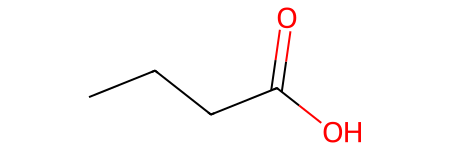

In [17]:
### Inference

Test_SMILES = 'CCCC(=O)O'
Expected_odors = 'fruity, sour, dairy, sharp, cheesy, buttery'

mol = Chem.MolFromSmiles(Test_SMILES)
mol

<Axes: xlabel='odors'>

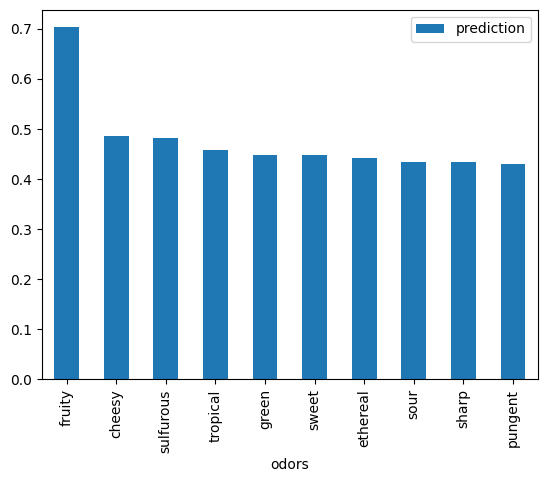

In [18]:
# Featuize test smiles
featurizer = GraphFeaturizer()
featurized_data = featurizer.featurize(Test_SMILES)

# Get predictions from trained model
prediction = model.predict(dc.data.NumpyDataset(featurized_data))

# Visualize the top 10 predictions
prediction_df = pd.DataFrame({'odors': TASKS, 'prediction': prediction.squeeze()}).sort_values(by='prediction', ascending=False)
prediction_df[:10].plot.bar(x='odors', y='prediction')

In [20]:
def pom_plot(model, dataset, is_preds=False):
   pom_embeds = model.predict_embedding(dataset)
   required_desc = list(dataset.tasks)


   # Define type dictionaries for odor categories to be visualized
   type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
   type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
   type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
  
   # Perform Principal Component Analysis (PCA) to reduce the dimensionality of the embeddings to 2 components
   pca = PCA(n_components=2, iterated_power=10)
   reduced_features = pca.fit_transform(pom_embeds)


   # Get the variance explained by the first two principal components
   variance_explained = pca.explained_variance_ratio_
   variance_pc1 = variance_explained[0]
   variance_pc2 = variance_explained[1]


   # If is_preds is True, use the model to make predictions on the dataset
   if is_preds:
       y_preds = model.predict(dataset)
       # Set a threshold for predictions
       threshold = np.percentile(y_preds, 95, axis=0)
       y = (y_preds >= threshold).astype(int)
   else:
       # Otherwise, use the true labels from the dataset
       y = dataset.y


   # Define a grid of points for Kernel Density Estimation (KDE)
   x_grid, y_grid = np.meshgrid(np.linspace(reduced_features[:, 0].min(), reduced_features[:, 0].max(), 500),
                                np.linspace(reduced_features[:, 1].min(), reduced_features[:, 1].max(), 500))
   grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()])


   # Define a function to get KDE values for a specific label
   def get_kde_values(label):
       plot_idx = required_desc.index(label)
       label_indices = np.where(y[:, plot_idx] == 1)[0]
       kde_label = gaussian_kde(reduced_features[label_indices].T)
       kde_values_label = kde_label(grid_points)
       kde_values_label = kde_values_label.reshape(x_grid.shape)
       return kde_values_label
  
   # Define a function to plot contours for a given type dictionary
   def plot_contours(type_dictionary, bbox_to_anchor):
       main_label = list(type_dictionary.keys())[0]
       plt.contourf(x_grid, y_grid, get_kde_values(main_label), levels=1, colors=['#00000000',type_dictionary[main_label],type_dictionary[main_label]])
       legend_elements = []
       for label, color in type_dictionary['subs'].items():
           plt.contour(x_grid, y_grid, get_kde_values(label), levels=1, colors=color, linewidths=2)
           legend_elements.append(Patch(facecolor=color, label=label))
       legend = plt.legend(handles=legend_elements, title=main_label, bbox_to_anchor=bbox_to_anchor)
       legend.get_frame().set_facecolor(type_dictionary[main_label])
       plt.gca().add_artist(legend)


   # Create a figure and plot contours for different types
   plt.figure(figsize=(15, 10))
   plt.title('KDE Density Estimation with Contours in Reduced Space')
   plt.xlabel(f'Principal Component 1 ({round(variance_pc1*100, ndigits=2)}%)')
   plt.ylabel(f'Principal Component 2 ({round(variance_pc2*100, ndigits=2)}%)')
   plot_contours(type_dictionary=type1, bbox_to_anchor = (0.2, 0.8))
   plot_contours(type_dictionary=type2, bbox_to_anchor = (0.9, 0.4))
   plot_contours(type_dictionary=type3, bbox_to_anchor = (0.3, 0.1))


   # Display the plot
   plt.show()
   plt.close()

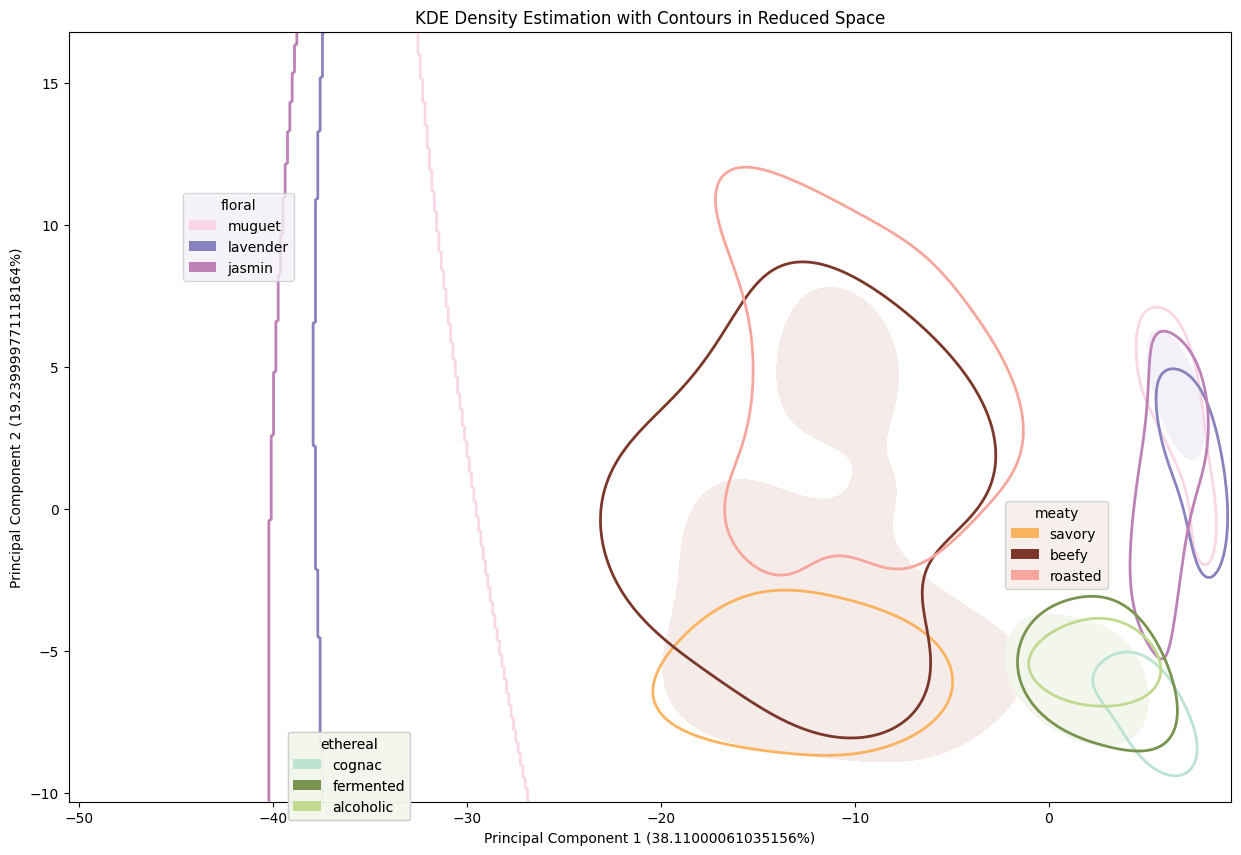

In [21]:
pom_plot(model, dataset, is_preds=False)

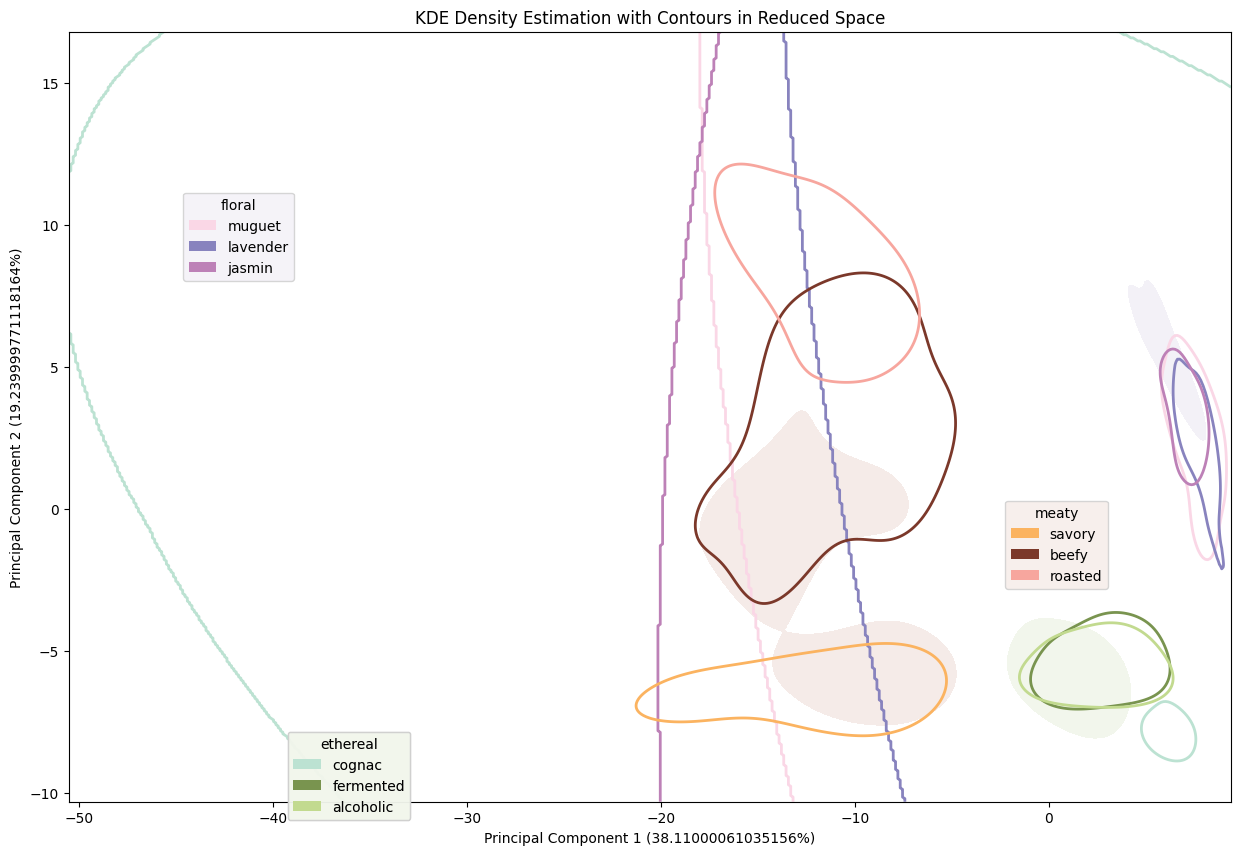

In [22]:
pom_plot(model, dataset, is_preds=True)